In [11]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import warnings

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from keras import optimizers

import seaborn as sns
import matplotlib.pyplot as plt

# Filter out warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names.*")
warnings.filterwarnings("ignore", message="lbfgs failed to converge.*")
warnings.filterwarnings("ignore", message="The default value of `dual` will change.*")
warnings.filterwarnings("ignore", message="Liblinear failed to converge.*")

In [12]:
# training the models
dt=pd.read_excel("r2d2.xlsx")

data3=dt[dt['3D /2D']=='3D']
data3['Rayleigh_number_log'] = np.log(data3['Rayleigh number'])
data3['Prandtl_number_log'] = np.log(data3['Prandtl number '])
data3['Reynolds_number_log'] = np.log(data3['Reynolds Number'])

Y=data3['Reynolds_number_log']
X=data3[['Rayleigh_number_log', 'Prandtl_number_log']]

#splitting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=.2, random_state=42)

score = []
mae =[]

#linear regression
from sklearn import linear_model
multi_regression=linear_model.LinearRegression()
multi_regression.fit(x_train,y_train)
y_pred = multi_regression.predict(x_test)
score.append(r2_score(y_test, y_pred))
mae.append(mean_absolute_error(y_test, y_pred))


#lasso
from sklearn.linear_model import Lasso
lasso_regression = Lasso()
lasso_regression.fit(x_train,y_train)
y_pred = lasso_regression.predict(x_test)
score.append(r2_score(y_test, y_pred))
mae.append(mean_absolute_error(y_test, y_pred))

#random forest
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators=100, random_state=102)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
score.append(r2_score(y_test, y_pred))
mae.append(mean_absolute_error(y_test, y_pred))

#support vector regression
from sklearn.svm import LinearSVR
svr = LinearSVR()
svr.fit(x_train, y_train)
y_pred = svr.predict(x_test)
score.append(r2_score(y_test, y_pred))
mae.append(mean_absolute_error(y_test, y_pred))
    

In [13]:
#neural network
X_rayleigh = data3['Rayleigh_number_log'] 
X_prandtl = data3['Prandtl_number_log']
y_reynolds = data3['Reynolds_number_log']

# Preprocessing: Normalize the input features
X = np.column_stack((X_rayleigh, X_prandtl))
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_normalized = (X - X_mean) / X_std

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_reynolds, test_size=0.2, random_state=42)

# Build the neural network model
model = Sequential([Dense(128, activation='relu', input_shape=(2,)),Dense(64, activation='relu'),Dense(32, activation='relu'),Dense(16, activation='relu'),Dense(1)])

# Compile the model
optimizer = optimizers.Adam(learning_rate=0.001)
model.compile(optimizer, loss='mean_squared_error')


hist = None
batches=[8,16,32,64]
for batch in batches:
    h_ = model.fit(X_train, y_train, epochs=200, batch_size=batch,validation_split=0.2)
    if hist is None:
        hist = h_
    else:
        for k in hist.history:
            hist.history[k] = np.concatenate([hist.history[k],h_.history[k]])
            
y_pred = model.predict(X_test)
score.append(r2_score(y_test, y_pred))
mae.append(mean_absolute_error(y_test, y_pred))

Epoch 1/200
23/23 [==============================] - 1s 11ms/step - loss: 39.7470 - val_loss: 32.3492
Epoch 2/200
23/23 [==============================] - 0s 4ms/step - loss: 28.8806 - val_loss: 16.3134
Epoch 3/200
23/23 [==============================] - 0s 4ms/step - loss: 7.9004 - val_loss: 5.2845
Epoch 4/200
23/23 [==============================] - 0s 4ms/step - loss: 2.6363 - val_loss: 2.2255
Epoch 5/200
23/23 [==============================] - 0s 6ms/step - loss: 1.5395 - val_loss: 1.3703
Epoch 6/200
23/23 [==============================] - 0s 5ms/step - loss: 1.0402 - val_loss: 0.9217
Epoch 7/200
23/23 [==============================] - 0s 6ms/step - loss: 0.6854 - val_loss: 0.5917
Epoch 8/200
23/23 [==============================] - 0s 6ms/step - loss: 0.4883 - val_loss: 0.3855
Epoch 9/200
23/23 [==============================] - 0s 4ms/step - loss: 0.3541 - val_loss: 0.2750
Epoch 10/200
23/23 [==============================] - 0s 2ms/step - loss: 0.2704 - val_loss: 0.2217
Epoc

In [14]:
def Multilinear_Regression(new_data_point):
    predicted_reynolds_number = multi_regression.predict(new_data_point)
    print("Predicted Reynolds Number by Multilinear Regression:", np.exp(predicted_reynolds_number[0]))
    
def Lasso_Regression(new_data_point):
    predicted_reynolds_number = lasso_regression.predict(new_data_point)
    print("Predicted Reynolds Number by Lasso Regression:", np.exp(predicted_reynolds_number[0]))

def Random_forest(new_data_point):
    predicted_reynolds_number = random_forest.predict(new_data_point)
    print("Predicted Reynolds Number by Random Forest:", np.exp(predicted_reynolds_number[0]))
    
def SVR(new_data_point):
    predicted_reynolds_number = svr.predict(new_data_point)
    print("Predicted Reynolds Number by Support Vector Regression:", np.exp(predicted_reynolds_number[0]))

def Neural_Network(new_input):
    new_input_normalized = (new_input - X_mean) / X_std
    predicted_reynolds = model.predict(new_input_normalized)
    print("Predicted Reynolds Number by neural network:", np.exp(predicted_reynolds[0][0]))

In [34]:

#Ra, Pr = map(float, input("Enter the values Rayleigh number and Prandtl number separated by space: ").split())
Ra=np.log(1.00E+7)
Pr=np.log(7)

new_data_point = np.array([[Ra, Pr]])

Multilinear_Regression(new_data_point)
Lasso_Regression(new_data_point)
Random_forest(new_data_point)
SVR(new_data_point)
Neural_Network(new_data_point)

Predicted Reynolds Number by Multilinear Regression: 115.3025637452216
Predicted Reynolds Number by Lasso Regression: 134.85817171401513
Predicted Reynolds Number by Random Forest: 71.03507902084786
Predicted Reynolds Number by Support Vector Regression: 94.3333632824278
1/1 [==============================] - 0s 50ms/step
Predicted Reynolds Number by neural network: 98.09014


In [16]:
# using Ra=5.0E+07	Pr=1.00E+02	1	Re=17.1	
models=['Multilinear Regression',"Lasso Regression","Random forest","Support Vector Regression","Neural_Network"]
def measures(score,model,mae):
    print("The accuracy of ",model," is {}%".format(round(score, 2) *100))
    print("The mean absolute error of ",model," is {}%".format(round(mae, 2) *100),"\n")
for i in range(len(models)):
    measures(score[i],models[i],mae[i])


The accuracy of  Multilinear Regression  is 85.0%
The mean absolute error of  Multilinear Regression  is 90.0% 

The accuracy of  Lasso Regression  is 84.0%
The mean absolute error of  Lasso Regression  is 97.0% 

The accuracy of  Random forest  is 96.0%
The mean absolute error of  Random forest  is 34.0% 

The accuracy of  Support Vector Regression  is 65.0%
The mean absolute error of  Support Vector Regression  is 77.0% 

The accuracy of  Neural_Network  is 97.0%
The mean absolute error of  Neural_Network  is 30.0% 



Text(0.5, 23.38159722222222, 'Models')

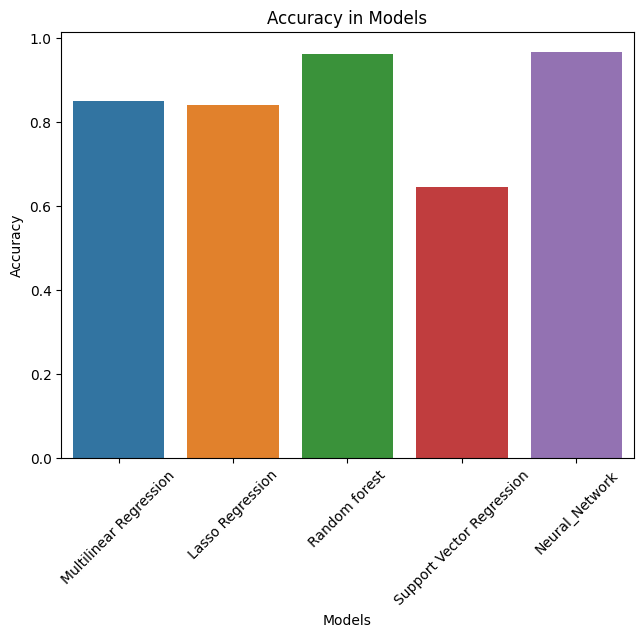

In [17]:
sns.barplot(x=models,y=score)
plt.tight_layout()
plt.xticks(rotation=45)
plt.title("Accuracy in Models")
plt.ylabel("Accuracy")
plt.xlabel("Models")

Text(0.5, 23.38159722222222, 'Models')

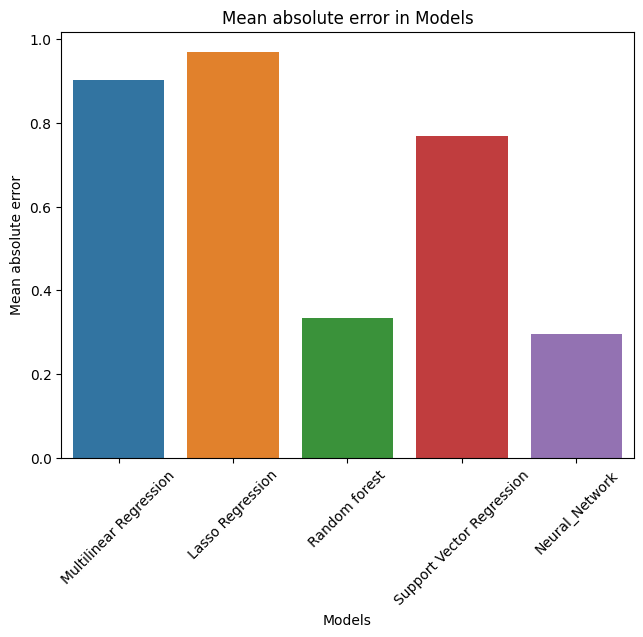

In [18]:
sns.barplot(x=models,y=mae)
plt.tight_layout()
plt.xticks(rotation=45)
plt.title("Mean absolute error in Models")
plt.ylabel("Mean absolute error")
plt.xlabel("Models")